In [68]:
from scipy.signal import savgol_filter,butter, filtfilt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]  # 设置图形的默认尺寸为20x5英寸

import pyDMSP

In [69]:
ssies3_fp = r"G:\0_postgraduate\DMSP\data\2014\f16\ssies3\dmsp-f16_ssies-3_thermal-plasma_201401010137_v01.cdf"
ssm_fp = r"G:\0_postgraduate\DMSP\data\2014\f16\ssm\dmsp-f16_ssm_magnetometer_20140101_v1.0.4.cdf"

ssies3_data_SC, ssm_data_clip = pyDMSP.data_for_draw(ssies3_fp,ssm_fp,is_f17=False)

ssies3_data_SC['V_SC_x_fillna']= ssies3_data_SC['V_SC_x'].fillna(method='ffill').fillna(method='bfill')
ssies3_data_SC['V_SC_y_fillna']= ssies3_data_SC['V_SC_y'].fillna(method='ffill').fillna(method='bfill')
ssies3_data_SC['V_SC_z_fillna']= ssies3_data_SC['V_SC_z'].fillna(method='ffill').fillna(method='bfill')

ssm_data_clip['DELTA_B_SC_x_fillna']= ssm_data_clip['DELTA_B_SC_x'].fillna(method='ffill').fillna(method='bfill')
ssm_data_clip['DELTA_B_SC_y_fillna']= ssm_data_clip['DELTA_B_SC_y'].fillna(method='ffill').fillna(method='bfill')
ssm_data_clip['DELTA_B_SC_z_fillna']= ssm_data_clip['DELTA_B_SC_z'].fillna(method='ffill').fillna(method='bfill')

In [70]:
vx_bdf = pyDMSP.BandPassFilter(ssies3_data_SC['V_SC_x_fillna'],ssies3_data_SC['Epoch'],'01010137')
vy_bdf = pyDMSP.BandPassFilter(ssies3_data_SC['V_SC_y_fillna'],ssies3_data_SC['Epoch'],'01010137')
vz_bdf = pyDMSP.BandPassFilter(ssies3_data_SC['V_SC_z_fillna'],ssies3_data_SC['Epoch'],'01010137')

delta_bx_bdf = pyDMSP.BandPassFilter(ssm_data_clip['DELTA_B_SC_x_fillna'],ssm_data_clip['Epoch'],'01010137')
delta_by_bdf = pyDMSP.BandPassFilter(ssm_data_clip['DELTA_B_SC_y_fillna'],ssm_data_clip['Epoch'],'01010137')
delta_bz_bdf = pyDMSP.BandPassFilter(ssm_data_clip['DELTA_B_SC_z_fillna'],ssm_data_clip['Epoch'],'01010137')

In [71]:
# 设定滤波器参数
fs = 1  # 采样频率
cutoff = 0.01  # 截止频率（Hz）
nyq = 0.5 * fs  # 奈奎斯特频率
normal_cutoff = cutoff / nyq  # 归一化截止频率

# 设计Butterworth低通滤波器
b = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)[0]
a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)[1]

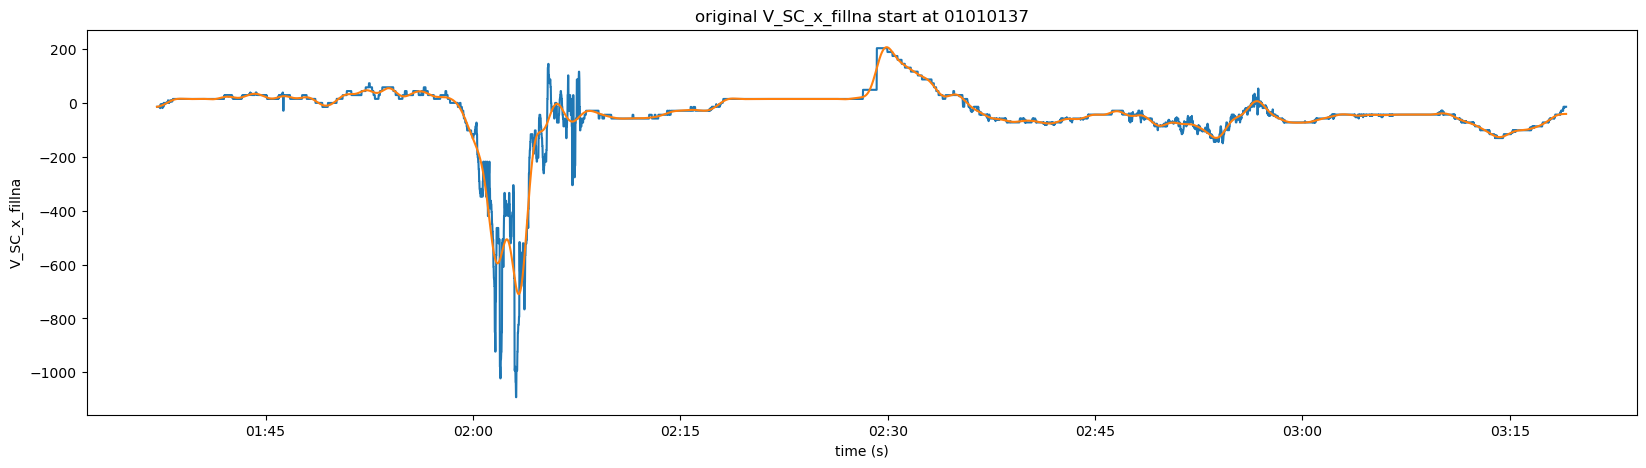

In [72]:
v_sc_x_fillna_filter = filtfilt(b, a, ssies3_data_SC['V_SC_x_fillna'])
v_sc_y_fillna_filter = filtfilt(b, a, ssies3_data_SC['V_SC_y_fillna'])
v_sc_z_fillna_filter = filtfilt(b, a, ssies3_data_SC['V_SC_z_fillna'])

fig = vx_bdf.draw_original_signal()
plt.plot(ssies3_data_SC['Epoch'],v_sc_x_fillna_filter)

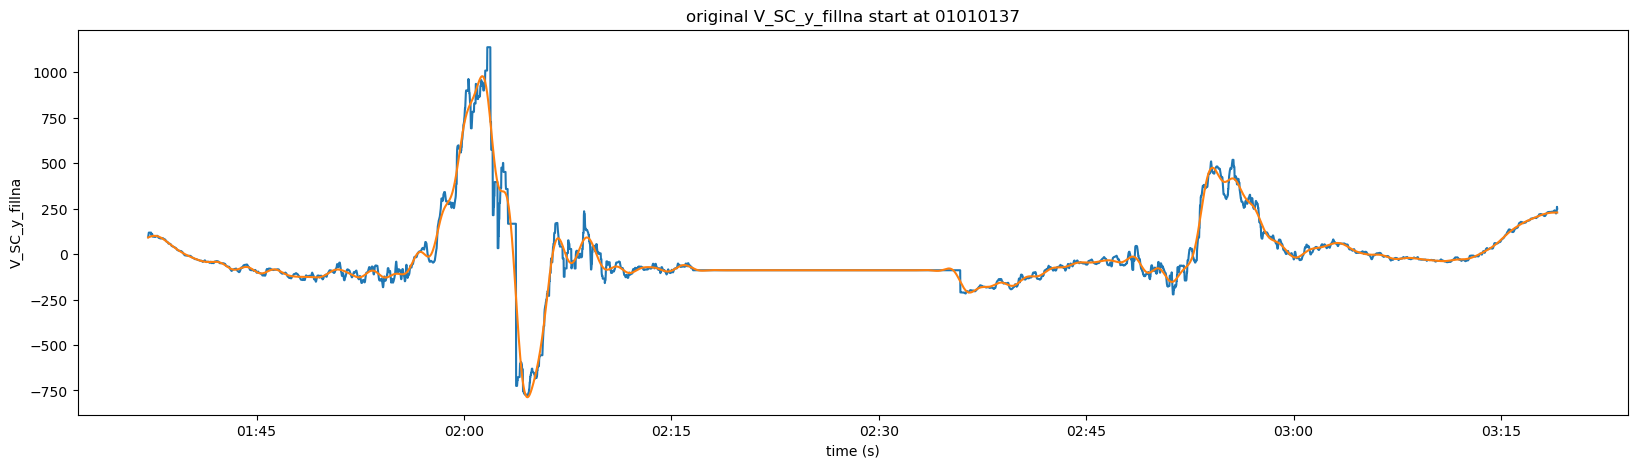

In [73]:
fig = vy_bdf.draw_original_signal()
plt.plot(ssies3_data_SC['Epoch'],v_sc_y_fillna_filter)

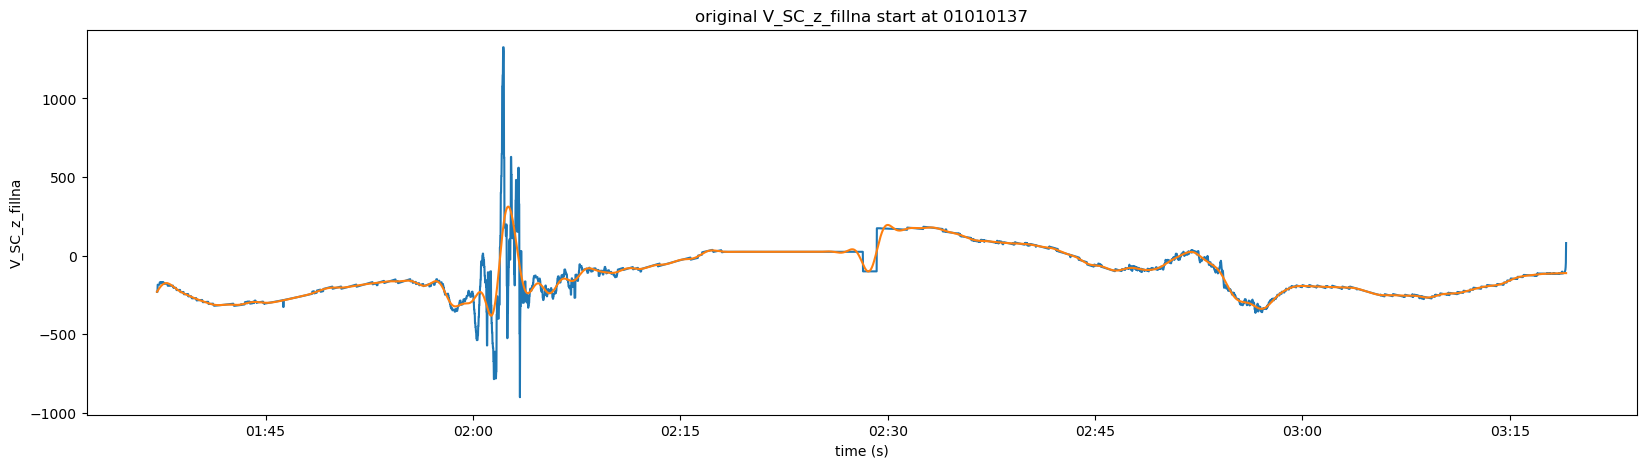

In [74]:
fig = vz_bdf.draw_original_signal()
plt.plot(ssies3_data_SC['Epoch'],v_sc_z_fillna_filter)

In [77]:
# 设定滤波器参数
fs = 1  # 采样频率
cutoff = 0.01  # 截止频率（Hz）
nyq = 0.5 * fs  # 奈奎斯特频率
normal_cutoff = cutoff / nyq  # 归一化截止频率

# 设计Butterworth低通滤波器
b = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)[0]
a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)[1]

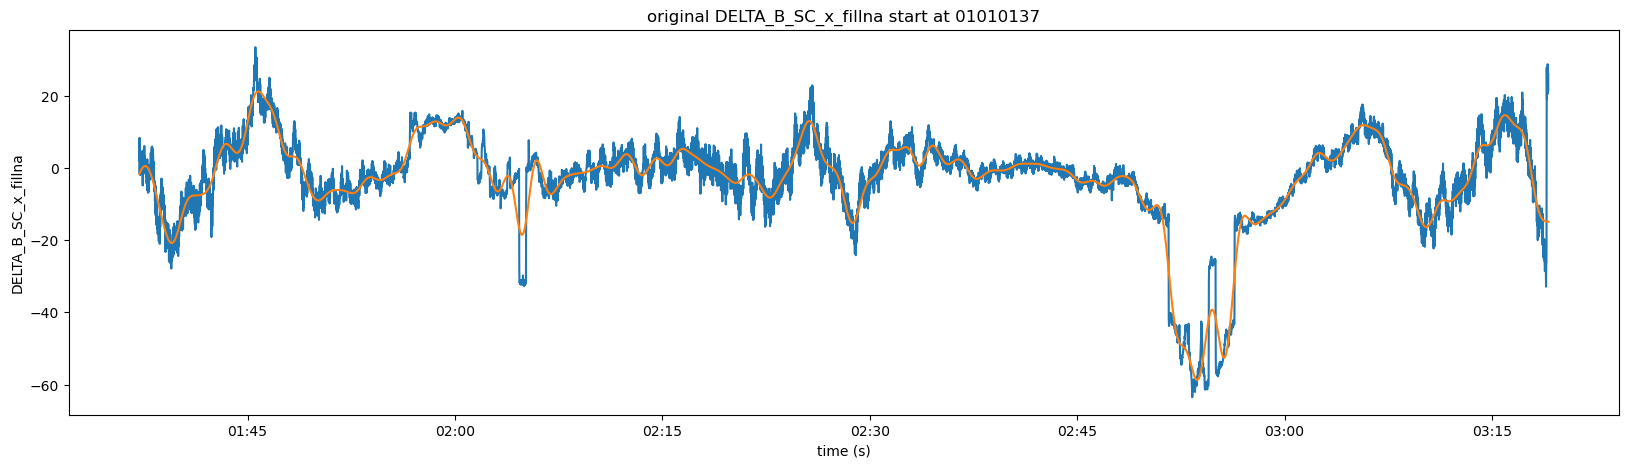

In [78]:
v_sc_x_fillna_filter = filtfilt(b, a, ssm_data_clip['DELTA_B_SC_x_fillna'])
v_sc_y_fillna_filter = filtfilt(b, a, ssm_data_clip['DELTA_B_SC_y_fillna'])
v_sc_z_fillna_filter = filtfilt(b, a, ssm_data_clip['DELTA_B_SC_z_fillna'])

fig = delta_bx_bdf.draw_original_signal()
plt.plot(ssm_data_clip['Epoch'],v_sc_x_fillna_filter)

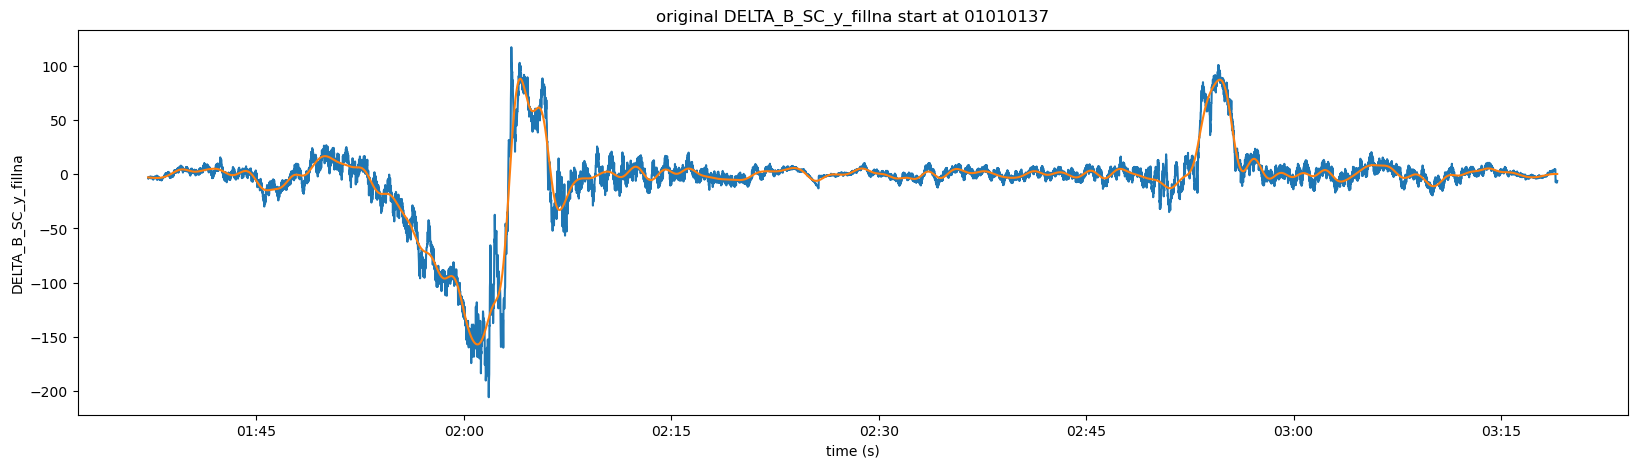

In [79]:
fig = delta_by_bdf.draw_original_signal()
plt.plot(ssm_data_clip['Epoch'],v_sc_y_fillna_filter)

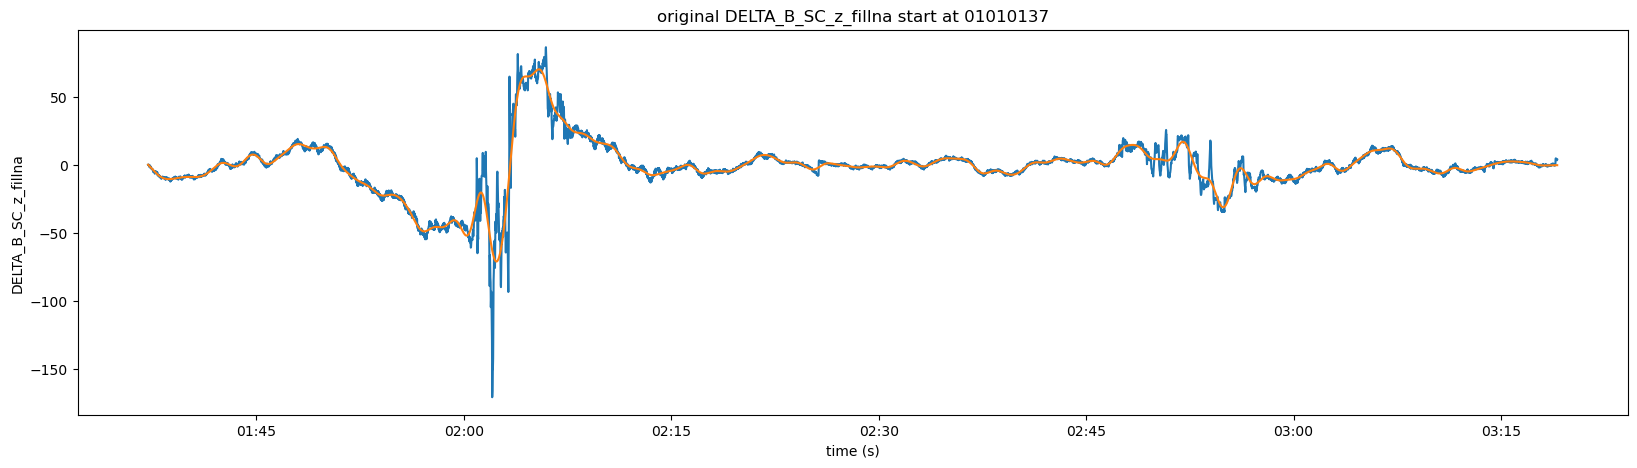

In [80]:
fig = delta_bz_bdf.draw_original_signal()
plt.plot(ssm_data_clip['Epoch'],v_sc_z_fillna_filter)